In [57]:
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image 

CATEGORIES = ["airplane","apple","axe","banana","baseball","bee","bus","car","diamond",
              "grapes","grass","hand","pineapple","tornado"]

drawing = "apple2.jpg"

def prepare(filepath):
    IMG_SIZE = 28
#     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_array = crop(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
    print(new_array.shape)
    plt.imshow(new_array, interpolation='nearest')
    plt.show()
#     imgplot = plt.imshow(new_array)
#     plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  

model = tf.keras.models.load_model("kerasmodel.h5")

In [58]:
def deletenp(filepath, top, right, bot, left):
    data = filepath
    for i in range(top):
        data = np.delete(data, 0, 0)
        
    data = np.rot90(data)
    for i in range(right):
        data = np.delete(data, 0, 0)
      
    data = np.rot90(data)
    for i in range(bot):
        data = np.delete(data, 0, 0)
        
    data = np.rot90(data)
    for i in range(left):
        data = np.delete(data, 0, 0)
        
    data = np.rot90(data)
    return data

def check255(array):
    for i in array:
            if(i != 255):
                return 1

# data = np.array([
#     [255, 255, 255, 255, 255],
#     [255, 255, 255, 255, 255],
#     [255, 1, 1, 1, 255],
#     [255, 1, 1, 1, 255],
#     [255, 1, 255, 1, 255],
#     [255, 255, 255, 255, 255],
#     [255, 255, 255, 255, 255],
# ])
def crop(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    print("img type:", img_array.dtype)
    print("img shape:", img_array.shape)
    #crop top
    top = 0
    for i in img_array: 
        if(check255(i)):
            break
        else:
            top += 1
            continue
            
    #crop right
    rotright = np.rot90(img_array)
    right = 0
    for i in rotright:
        if(check255(i)):
            break
        else:
            right += 1
            continue
            
    #crop bottom
    bot = 0
    rotbot = np.rot90(rotright)
    for i in rotbot:
        if(check255(i)):
            break
        else:
            bot += 1
            continue
            
    #crop left
    left = 0
    rotleft = np.rot90(rotbot)
    for i in rotleft:
        if(check255(i)):
            break
        else:
            left += 1
            continue
    minval =  min(top, right, left, bot)       
    crop_array = deletenp(img_array, minval, minval, minval, minval)
    plt.imshow(crop_array, interpolation='nearest')
    plt.show()
    print("img type:", crop_array.dtype)
    print("img shape:", crop_array.shape)
    return crop_array


img type: uint8
img shape: (300, 300)


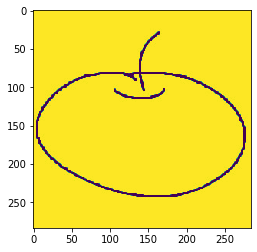

img type: uint8
img shape: (284, 284)
(28, 28)


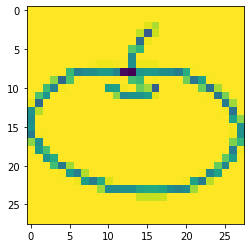

Time taken was 0.7789311408996582 seconds


In [59]:
t1 = time.time()
prediction = model.predict([prepare(drawing)])
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))
prediction = list(prediction[0])

In [60]:
print(CATEGORIES[prediction.index(max(prediction))])

apple


In [61]:
print(prediction)

[0.00010147167, 0.9924595, 0.0011184703, 0.0001937017, 0.0004603529, 0.002341914, 4.5029283e-05, 0.0009635401, 0.0006059745, 0.0001550462, 0.00036862752, 5.468966e-05, 0.0009934086, 0.00013802884]


In [62]:
print(max(prediction))

0.9924595


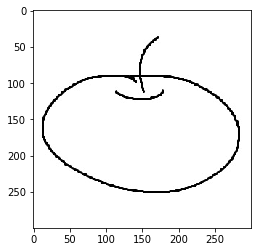

In [63]:
img=cv2.imread(drawing)
img
imgplot = plt.imshow(img)
plt.show()